## Trabalhadno com dados de atropelamento de fauna
### Ocorrências de atropelamento de fauna entre 2006 e 2009 em SP

## Usando pandas

In [1]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()


import os
#definindo pasta
path='C:/Users/edinei.acm/ENS410064_OK/ENS410064/Dados/AtropelamentoSP'
os.chdir(path)


files = os.listdir(path)
print(files)


allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file, encoding=  'ISO-8859-1' )
        allData.append(data)

['Roadkills2006.csv', 'Roadkills2007.csv', 'Roadkills2008.csv', 'Roadkills2009.csv']
Roadkills2006.csv
Roadkills2007.csv
Roadkills2008.csv
Roadkills2009.csv


In [2]:
allDataDf = pd.concat(allData)

print(allDataDf.iloc[560, :])

# Converta a coluna 'data' em um objeto datetime
allDataDf['data'] = pd.to_datetime(allDataDf['data'])

# Defina 'data' como o índice do DataFrame
allDataDf.set_index('data', inplace=True)

# Criando colunas com ano, mês e dia
allDataDf['year'] = allDataDf.index.year
allDataDf['month'] =allDataDf.index.month
allDataDf['day'] = allDataDf.index.day


allDataDf


data                3/22/2009
time                    13:30
road                    SP310
Km                   168+000 
x                     -22.462
y                   -47.53547
cientific name    Dasypus sp.
Unnamed: 7                NaN
Name: 29, dtype: object


,time,road,Km,x,y,cientific name,Unnamed: 7,year,month,day
data,,,,,,,,,,
2006-01-04,9:24,SP225,095+950,-22.23854,-47.80302,Nasua nasua,NaN,2006,1,4
2006-01-07,6:15,SP225,139+250,-22.26726,-48.20482,Cerdocyon thous,NaN,2006,1,7
2006-01-07,6:15,SP225,139+250,-22.26726,-48.20482,Lepus europaeus,NaN,2006,1,7
2006-01-09,8:24,SP310,164+600,-22.47033,-47.50519,Hydrochoerus hydrochaeris,NaN,2006,1,9
2006-01-11,23:28,SP310,156+850,-22.49238,-47.43421,Hydrochoerus hydrochaeris,NaN,2006,1,11
...,...,...,...,...,...,...,...,...,...,...
2009-07-19,3:15:00,SP310,161+400,"22,47991","47,47482",Hydrochoerus hydrochaeris,NaN,2009,7,19
2009-07-22,16:17:00,SP225,216+900,"22,33241","48,90906",Cerdocyon thous,NaN,2009,7,22
2009-07-29,5:44:00,SP225,163+300,"22,26647","48,41408",Hydrochoerus hydrochaeris,NaN,2009,7,29


In [16]:
## Somar atropelamento anual

Atropelamento2006=0
Atropelamento2007=0
Atropelamento2008=0
Atropelamento2009=0

for index, row in allDataDf.iterrows():
    if row['year'] == 2006:
        Atropelamento2006 += 1
    if row['year'] == 2007:
        Atropelamento2007 += 1
    if row['year'] == 2008:
        Atropelamento2008 += 1
    if row['year'] == 2009:
        Atropelamento2009 += 1
        
print('O numero de animais atropelados em 2006 foi '+str(Atropelamento2006))
print('O numero de animais atropelados em 2007 foi '+str(Atropelamento2007))
print('O numero de animais atropelados em 2008 foi '+str(Atropelamento2008))
print('O numero de animais atropelados em 2009 foi '+str(Atropelamento2009))

O numero de animais atropelados em 2006 foi 161
O numero de animais atropelados em 2007 foi 135
O numero de animais atropelados em 2008 foi 235
O numero de animais atropelados em 2009 foi 65


Index(['level_0', 'index', 'data', 'time', 'road', 'Km', 'x', 'y',
       'cientific name', 'Unnamed: 7', 'year', 'month', 'day'],
      dtype='object')
     level_0  index       data      time   road        Km         x         y  \
0          0      0 2006-01-04      9:24  SP225   095+950 -22.23854 -47.80302   
1          1      1 2006-01-07      6:15  SP225   139+250 -22.26726 -48.20482   
2          2      2 2006-01-07      6:15  SP225   139+250 -22.26726 -48.20482   
3          3      3 2006-01-09      8:24  SP310   164+600 -22.47033 -47.50519   
4          4      4 2006-01-11     23:28  SP310   156+850 -22.49238 -47.43421   
..       ...    ...        ...       ...    ...       ...       ...       ...   
591      591    591 2009-07-19   3:15:00  SP310  161+400   22,47991  47,47482   
592      592    592 2009-07-22  16:17:00  SP225  216+900   22,33241  48,90906   
593      593    593 2009-07-29   5:44:00  SP225  163+300   22,26647  48,41408   
594      594    594 2009-07-30  10:56

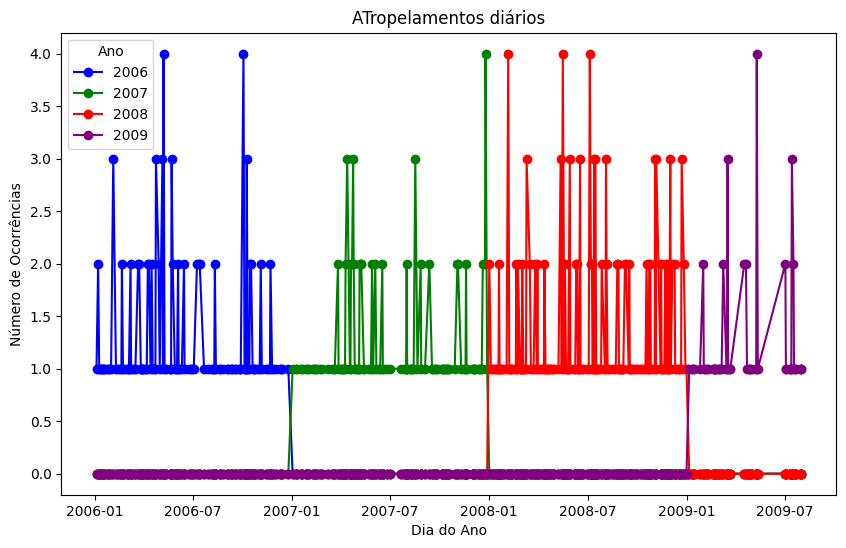

In [31]:
#fazendo gráfico
import matplotlib.pyplot as plt
allDataDf.reset_index(inplace=True, drop=True) #usar o data do index
print(allDataDf.columns)
print(allDataDf)

## Caso queira escolher só um ano:
#  filtre os dados para incluir apenas as ocorrências 
#df_2006 = allDataDf[allDataDf['data'].allDataDf.year == 2006


# Primeiro, vamos criar um DataFrame intermediário para calcular as contagens por dia e ano
contagens_por_ano = allDataDf.groupby(['year', 'data']).size().unstack(fill_value=0)

# Crie uma figura
plt.figure(figsize=(10, 6))

# Defina cores diferentes para cada ano
cores = {
    2006: 'blue',
    2007: 'green',
    2008: 'red',
    2009: 'purple',
}

# Para cada ano, plote a linha com a cor correspondente
for ano, cor in cores.items():
    dados_ano = contagens_por_ano.loc[ano]
    
    plt.plot(
        dados_ano.index,
        dados_ano.values,
        marker='o',
        color=cor,
        label=str(ano),
    )

# Defina rótulos para os eixos x e y
plt.xlabel('Dia do Ano')
plt.ylabel('Número de Ocorrências')

# Defina um título para o gráfico
plt.title('ATropelamentos diários')

# Adicione uma legenda
plt.legend(title='Ano')

# Exiba o gráfico
plt.show()






